# Exploratory Data Analysis

we will explore several methods to see the characteristics which have the most impact on the car price

In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('clean_df_auto.csv')
df.head()

,symboling,normalized-losses,make,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,...,city-mpg,highway-mpg,price,city-L/100km,highway-L/100km,horsepower-binned,diesel,gas,std,turbo
0,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,0.890278,...,21,27,13495.0,11.190476,8.703704,Low,0,1,1,0
1,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,0.890278,...,21,27,16500.0,11.190476,8.703704,Low,0,1,1,0
2,1,122,alfa-romero,two,hatchback,rwd,front,94.5,0.822681,0.909722,...,19,26,16500.0,12.368421,9.038462,Medium,0,1,1,0
3,2,164,audi,four,sedan,fwd,front,99.8,0.848630,0.919444,...,24,30,13950.0,9.791667,7.833333,Low,0,1,1,0
4,2,164,audi,four,sedan,4wd,front,99.4,0.848630,0.922222,...,18,22,17450.0,13.055556,10.681818,Low,0,1,1,0


### Analyzing Individual Feature Patterns using Visualization 

To install seaborn we use the pip which is the python package manager.

Import visualization packages "Matplotlib" and "Seaborn", don't forget about "%matplotlib inline" to plot in a Jupyter notebook.

In [2]:
%%capture
! pip install seaborn

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

<h4>How to choose the right visualization method?</h4>
<p>When visualizing individual variables, it is important to first understand what type of variable you are dealing with. This will help us find the right visualization method for that variable.</p>


In [3]:
df.dtypes

symboling              int64
normalized-losses      int64
make                  object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower             int64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
city-L/100km         float64
highway-L/100km      float64
horsepower-binned     object
diesel                 int64
gas                    int64
std                    int64
turbo                  int64
dtype: object

In [4]:
# correlation between  variables of types "int64" and "float64" in df
df.corr()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,...,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,highway-L/100km,diesel,gas,std,turbo
symboling,1.000000,0.466264,-0.535987,-0.365404,-0.242423,-0.550160,-0.233118,-0.110581,-0.140019,-0.008153,...,0.279740,-0.035527,0.036233,-0.082391,0.066171,-0.029807,-0.196735,0.196735,0.054615,-0.054615
normalized-losses,0.466264,1.000000,-0.056661,0.019424,0.086802,-0.373737,0.099404,0.112360,-0.029862,0.055045,...,0.239543,-0.225016,-0.181877,0.133999,0.238567,0.181189,-0.101546,0.101546,0.006911,-0.006911
wheel-base,-0.535987,-0.056661,1.000000,0.876024,0.814507,0.590742,0.782097,0.572027,0.493244,0.158018,...,-0.360305,-0.470606,-0.543304,0.584642,0.476153,0.577576,0.307237,-0.307237,-0.256889,0.256889
length,-0.365404,0.019424,0.876024,1.000000,0.857170,0.492063,0.880665,0.685025,0.608971,0.123952,...,-0.285970,-0.665192,-0.698142,0.690628,0.657373,0.707108,0.211187,-0.211187,-0.230085,0.230085
width,-0.242423,0.086802,0.814507,0.857170,1.000000,0.306002,0.866201,0.729436,0.544885,0.188822,...,-0.245800,-0.633531,-0.680635,0.751265,0.673363,0.736728,0.244356,-0.244356,-0.305732,0.305732
height,-0.550160,-0.373737,0.590742,0.492063,0.306002,1.000000,0.307581,0.074694,0.180449,-0.060663,...,-0.309974,-0.049800,-0.104812,0.135486,0.003811,0.084301,0.281578,-0.281578,-0.090336,0.090336
curb-weight,-0.233118,0.099404,0.782097,0.880665,0.866201,0.307581,1.000000,0.849072,0.644060,0.167438,...,-0.279361,-0.749543,-0.794889,0.834415,0.785353,0.836921,0.221046,-0.221046,-0.321955,0.321955
engine-size,-0.110581,0.112360,0.572027,0.685025,0.729436,0.074694,0.849072,1.000000,0.572609,0.205928,...,-0.256733,-0.650546,-0.679571,0.872335,0.745059,0.783465,0.070779,-0.070779,-0.110040,0.110040
bore,-0.140019,-0.029862,0.493244,0.608971,0.544885,0.180449,0.644060,0.572609,1.000000,-0.055390,...,-0.267392,-0.582027,-0.591309,0.543155,0.554610,0.559112,0.054458,-0.054458,-0.227816,0.227816
stroke,-0.008153,0.055045,0.158018,0.123952,0.188822,-0.060663,0.167438,0.205928,-0.055390,1.000000,...,-0.063561,-0.033956,-0.034636,0.082269,0.036133,0.047089,0.241064,-0.241064,-0.218233,0.218233


In [5]:
# or we can just calculate correlation between certain variables
df[['engine-size', 'wheel-base', 'city-L/100km', 'horsepower','price']].corr()

,engine-size,wheel-base,city-L/100km,horsepower,price
engine-size,1.000000,0.572027,0.745059,0.822668,0.872335
wheel-base,0.572027,1.000000,0.476153,0.371178,0.584642
city-L/100km,0.745059,0.476153,1.000000,0.889482,0.789898
horsepower,0.822668,0.371178,0.889482,1.000000,0.809607
price,0.872335,0.584642,0.789898,0.809607,1.000000


<h2>Continuous numerical variables:</h2> 

<p>Continuous numerical variables are variables that may contain any value within some range. Continuous numerical variables can have the type "int64" or "float64". A great way to visualize these variables is by using scatterplots with fitted lines.</p>

<p>In order to start understanding the (linear) relationship between an individual variable and the price. We can do this by using "regplot", which plots the scatterplot plus the fitted regression line for the data.</p>

             engine-size     price
engine-size     1.000000  0.872335
price           0.872335  1.000000 



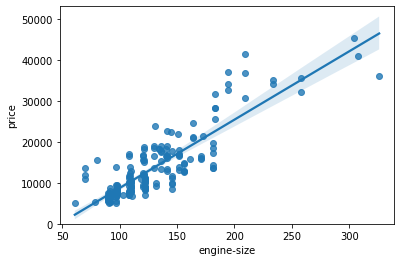

In [6]:
# Is "engine size" a potential predictor variable of price ?

sns.regplot(x="engine-size", y="price", data=df)
plt.ylim(0,)

print(df[['engine-size','price']].corr(),'\n')

As the engine-size goes up, the price goes up: this indicates a positive direct correlation between these two variables. Engine size seems like a pretty good predictor of price since the regression line is almost a perfect diagonal line.

We can examine the correlation between 'engine-size' and 'price' and see it's approximately 0.87

             highway-mpg     price
highway-mpg     1.000000 -0.704692
price          -0.704692  1.000000 



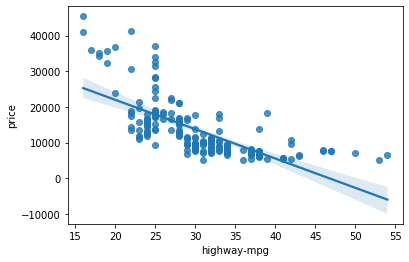

In [7]:
# Is "highway-mpg" a potential predictor variable of price ?

print(df[["highway-mpg",'price']].corr(),'\n')
sns.regplot("highway-mpg", "price", data=df)

As the highway-mpg goes up, the price goes down: this indicates an inverse/negative relationship between these two variables. Highway mpg could potentially be a predictor of price.

We can examine the correlation between 'highway-mpg' and 'price' and see it's approximately -0.704

          peak-rpm     price
peak-rpm  1.000000 -0.101616
price    -0.101616  1.000000 



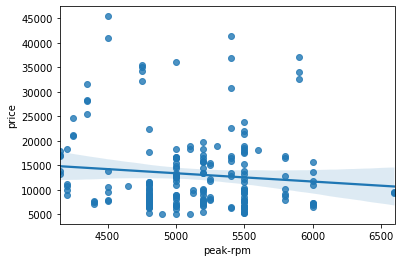

In [8]:
# Is "peak-rpm" a potential predictor variable of price ?

print(df[["peak-rpm",'price']].corr(),'\n')
sns.regplot("peak-rpm", "price", data=df)

Peak rpm does not seem like a good predictor of the price at all since the regression line is close to horizontal. Also, the data points are very scattered and far from the fitted line, showing lots of variability. Therefore it's it is not a reliable variable.

We can examine the correlation between 'peak-rpm' and 'price' and see it's approximately -0.101616

<h3>Categorical variables</h3>

<p>These are variables that describe a 'characteristic' of a data unit, and are selected from a small group of categories. The categorical variables can have the type "object" or "int64". A good way to visualize categorical variables is by using boxplots.</p>

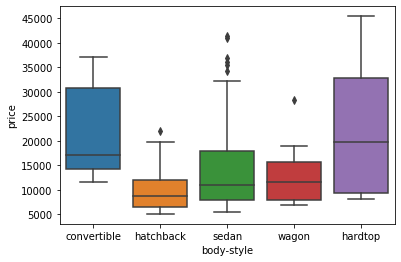

In [9]:
# Is "body-style" a potential predictor variable of price ?

sns.boxplot("body-style", "price", data = df)

<p>We see that the distributions of price between the different body-style categories have a significant overlap,</p>  <p>so body-style would not be a good predictor of price. </p>

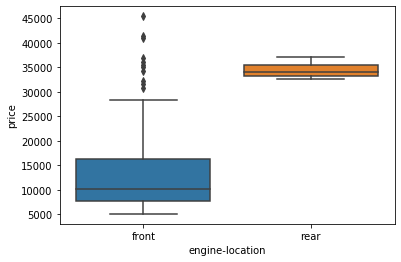

In [10]:
# Is "engine-location" a potential predictor variable of price ?

sns.boxplot(x="engine-location", y="price", data=df)

The distribution of price between these two engine-location categories are distinct enough to take engine-location as a potential good predictor of price.

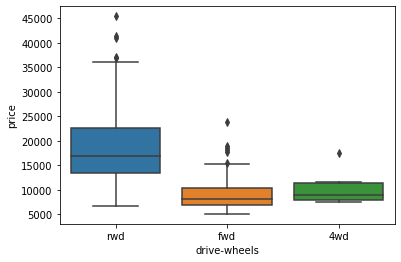

In [11]:
# Is "drive-wheels" a potential predictor variable of price ?

sns.boxplot(x="drive-wheels", y="price", data=df)

The distribution of price between the different drive-wheels categories differs; 

as such drive-wheels could potentially be a predictor of price.

### Descriptive Statistical Analysis

The __describe__ function automatically computes basic statistics for __all continuous variables__. Any NaN values are automatically skipped in these statistics.

In [12]:
df.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,...,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,highway-L/100km,diesel,gas,std,turbo
count,201.000000,201.00000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,...,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,0.840796,122.00000,98.797015,0.837102,0.915126,0.899108,2555.666667,126.875622,3.330692,3.256874,...,5117.665368,25.179104,30.686567,13207.129353,9.944145,8.044957,0.099502,0.900498,0.820896,0.179104
std,1.254802,31.99625,6.066366,0.059213,0.029187,0.040933,517.296727,41.546834,0.268072,0.316048,...,478.113805,6.423220,6.815150,7947.066342,2.534599,1.840739,0.300083,0.300083,0.384397,0.384397
min,-2.000000,65.00000,86.600000,0.678039,0.837500,0.799331,1488.000000,61.000000,2.540000,2.070000,...,4150.000000,13.000000,16.000000,5118.000000,4.795918,4.351852,0.000000,0.000000,0.000000,0.000000
25%,0.000000,101.00000,94.500000,0.801538,0.890278,0.869565,2169.000000,98.000000,3.150000,3.110000,...,4800.000000,19.000000,25.000000,7775.000000,7.833333,6.911765,0.000000,1.000000,1.000000,0.000000
50%,1.000000,122.00000,97.000000,0.832292,0.909722,0.904682,2414.000000,120.000000,3.310000,3.290000,...,5125.369458,24.000000,30.000000,10295.000000,9.791667,7.833333,0.000000,1.000000,1.000000,0.000000
75%,2.000000,137.00000,102.400000,0.881788,0.925000,0.928094,2926.000000,141.000000,3.580000,3.410000,...,5500.000000,30.000000,34.000000,16500.000000,12.368421,9.400000,0.000000,1.000000,1.000000,0.000000
max,3.000000,256.00000,120.900000,1.000000,1.000000,1.000000,4066.000000,326.000000,3.940000,4.170000,...,6600.000000,49.000000,54.000000,45400.000000,18.076923,14.687500,1.000000,1.000000,1.000000,1.000000


The default setting of "describe" skips variables of type object. We can apply the method "describe" on the variables of type __object__ as follows:

In [13]:
df.describe(include=['object'])

,make,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system,horsepower-binned
count,201,201,201,201,201,201,201,201,201
unique,22,2,5,3,2,6,7,8,3
top,toyota,four,sedan,fwd,front,ohc,four,mpfi,Low
freq,32,115,94,118,198,145,157,92,153


__Value Counts__

Value-counts is a good way of understanding how many units of each characteristic/variable we have. 
    The method __"value_counts"__ only works on Pandas series, not Pandas Dataframes. As a result, we only include one bracket df[''] not two brackets df[['']].

Let's see "drive-wheels" column

In [14]:
df['drive-wheels'].value_counts()

fwd    118
rwd     75
4wd      8
Name: drive-wheels, dtype: int64

We can convert the series to a Dataframe as follows :

In [15]:
df['drive-wheels'].value_counts().to_frame()

,drive-wheels
fwd,118
rwd,75
4wd,8


- save the result to the dataframe
- rename the column 'drive-wheels' to 'value_counts'
- rename the index to 'drive-wheels'

In [16]:
drive_wheels_counts = df['drive-wheels'].value_counts().to_frame()
drive_wheels_counts.rename(columns={'drive-wheels':'value_counts'},inplace=True)
drive_wheels_counts.index.name = 'drive-wheels'
drive_wheels_counts

,value_counts
drive-wheels,
fwd,118
rwd,75
4wd,8


In [17]:
# engine-location as variable
engine_loc_counts = df['engine-location'].value_counts().to_frame()
engine_loc_counts.rename(columns={'engine-location': 'value_counts'}, inplace=True)
engine_loc_counts.index.name = 'engine-location'
engine_loc_counts

,value_counts
engine-location,
front,198
rear,3


we only have three cars with a rear engine.

'engine-location' would not be a good predictor variable for the price. 

### Basics of Grouping

The "groupby" method groups data by different categories. The data is grouped based on one or several variables 

In [18]:
# Let's group by the variable "drive-wheels"

df['drive-wheels'].unique()

array(['rwd', 'fwd', '4wd'], dtype=object)

If we want to know, on average, __which type of drive wheel__ is most valuable, we can group "drive-wheels" and then average them.

In [19]:
df_group_drive = df[['drive-wheels', 'price']].groupby(['drive-wheels'], as_index=False).mean()
df_group_drive

,drive-wheels,price
0,4wd,10241.000000
1,fwd,9244.779661
2,rwd,19757.613333


From our data, it seems rear-wheel drive vehicles are, on average, the most expensive

We can also group with multiple variables.

In [20]:
# Let's group by both 'drive-wheels' and 'body-style'

df_grp_driv_body = df[['drive-wheels','body-style','price']].groupby(
    ['drive-wheels','body-style'],as_index=False).mean()

df_grp_driv_body

,drive-wheels,body-style,price
0,4wd,hatchback,7603.000000
1,4wd,sedan,12647.333333
2,4wd,wagon,9095.750000
3,fwd,convertible,11595.000000
4,fwd,hardtop,8249.000000
5,fwd,hatchback,8396.387755
6,fwd,sedan,9811.800000
7,fwd,wagon,9997.333333
8,rwd,convertible,23949.600000
9,rwd,hardtop,24202.714286


This grouped data is much easier to visualize when it is made into a pivot table. A pivot table is like an Excel spreadsheet. We can convert the dataframe to a pivot table using the method __"pivot "__ 

In [21]:
grouped_pivot = df_grp_driv_body.pivot(index='drive-wheels', columns='body-style')
grouped_pivot 

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  NaN           NaN   7603.000000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9811.800000   
rwd              23949.6  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

 We can fill these missing cells with the value 0, but any other value could potentially be used as well.

In [22]:
# fill missing values with 0
grouped_pivot = grouped_pivot.fillna(0) 
grouped_pivot

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  0.0      0.000000   7603.000000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9811.800000   
rwd              23949.6  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

We can use a heat map to visualize the relationship between variables

The heatmap plots the target variable (price) proportional to colour with respect to the variables 'drive-wheel' and 'body-style' in the vertical and horizontal axis respectively. This allows us to visualize how the price is related to 'drive-wheel' and 'body-style'.

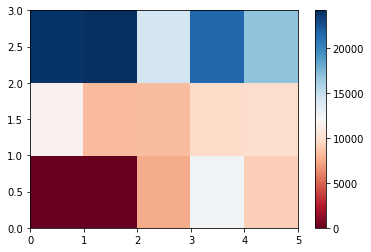

In [23]:
plt.pcolor(grouped_pivot, cmap='RdBu')
plt.colorbar()
plt.show()

The default labels convey no useful information to us

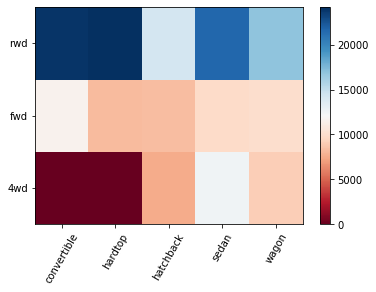

In [24]:
fig, ax = plt.subplots()
im = ax.pcolor(grouped_pivot, cmap='RdBu')

#label names
row_labels = grouped_pivot.columns.levels[1] # level[0] = 'price', level[1]='body-style'
col_labels = grouped_pivot.index

#move ticks and labels to the center
ax.set_xticks(np.arange(grouped_pivot.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(grouped_pivot.shape[0]) + 0.5, minor=False)

#insert labels
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)

#rotate label if too long
plt.xticks(rotation=60)

fig.colorbar(im)
plt.show()

### Correlation

a measure of the extent of interdependence between variables

<p3>Pearson Correlation</p>
<p>The Pearson Correlation measures the linear dependence between two variables X and Y.</p>
<p>The resulting coefficient is a value between -1 and 1 inclusive, where:</p>
<ul>
    <li><b>1</b>: Total positive linear correlation.</li>
    <li><b>0</b>: No linear correlation, the two variables most likely do not affect each other.</li>
    <li><b>-1</b>: Total negative linear correlation.</li>
</ul>

Pearson Correlation is the default method of the function "corr".

In [25]:
df.corr()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,...,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,highway-L/100km,diesel,gas,std,turbo
symboling,1.000000,0.466264,-0.535987,-0.365404,-0.242423,-0.550160,-0.233118,-0.110581,-0.140019,-0.008153,...,0.279740,-0.035527,0.036233,-0.082391,0.066171,-0.029807,-0.196735,0.196735,0.054615,-0.054615
normalized-losses,0.466264,1.000000,-0.056661,0.019424,0.086802,-0.373737,0.099404,0.112360,-0.029862,0.055045,...,0.239543,-0.225016,-0.181877,0.133999,0.238567,0.181189,-0.101546,0.101546,0.006911,-0.006911
wheel-base,-0.535987,-0.056661,1.000000,0.876024,0.814507,0.590742,0.782097,0.572027,0.493244,0.158018,...,-0.360305,-0.470606,-0.543304,0.584642,0.476153,0.577576,0.307237,-0.307237,-0.256889,0.256889
length,-0.365404,0.019424,0.876024,1.000000,0.857170,0.492063,0.880665,0.685025,0.608971,0.123952,...,-0.285970,-0.665192,-0.698142,0.690628,0.657373,0.707108,0.211187,-0.211187,-0.230085,0.230085
width,-0.242423,0.086802,0.814507,0.857170,1.000000,0.306002,0.866201,0.729436,0.544885,0.188822,...,-0.245800,-0.633531,-0.680635,0.751265,0.673363,0.736728,0.244356,-0.244356,-0.305732,0.305732
height,-0.550160,-0.373737,0.590742,0.492063,0.306002,1.000000,0.307581,0.074694,0.180449,-0.060663,...,-0.309974,-0.049800,-0.104812,0.135486,0.003811,0.084301,0.281578,-0.281578,-0.090336,0.090336
curb-weight,-0.233118,0.099404,0.782097,0.880665,0.866201,0.307581,1.000000,0.849072,0.644060,0.167438,...,-0.279361,-0.749543,-0.794889,0.834415,0.785353,0.836921,0.221046,-0.221046,-0.321955,0.321955
engine-size,-0.110581,0.112360,0.572027,0.685025,0.729436,0.074694,0.849072,1.000000,0.572609,0.205928,...,-0.256733,-0.650546,-0.679571,0.872335,0.745059,0.783465,0.070779,-0.070779,-0.110040,0.110040
bore,-0.140019,-0.029862,0.493244,0.608971,0.544885,0.180449,0.644060,0.572609,1.000000,-0.055390,...,-0.267392,-0.582027,-0.591309,0.543155,0.554610,0.559112,0.054458,-0.054458,-0.227816,0.227816
stroke,-0.008153,0.055045,0.158018,0.123952,0.188822,-0.060663,0.167438,0.205928,-0.055390,1.000000,...,-0.063561,-0.033956,-0.034636,0.082269,0.036133,0.047089,0.241064,-0.241064,-0.218233,0.218233


<b>P-value</b>: 
The P-value is the probability value whether show the correlation between two variables is statistically significant. 

Normally, we choose a significance level of 0.05, which means that we are 95% confident that the correlation between the variables is significant.

By convention, when the
<ul>
    <li>p-value is $<$ 0.001: we say there is strong evidence that the correlation is significant.</li>
    <li>the p-value is $<$ 0.05: there is moderate evidence that the correlation is significant.</li>
    <li>the p-value is $<$ 0.1: there is weak evidence that the correlation is significant.</li>
    <li>the p-value is $>$ 0.1: there is no evidence that the correlation is significant.</li>
</ul>

In [26]:
# to obtain this information using "stats" module in the "scipy" library.
from scipy import stats

### Calculations the corr. and p_values of the Variables

In [27]:
# Let's calculate the Pearson Correlation Coefficient and P-value of 'wheel-base' and 'price'.

pearson_coef, p_value = stats.pearsonr(df['wheel-base'], df['price'])
print('for **wheel-base** variable ','\n\n','pearson_corr: ',pearson_coef,'\n', 'p_value: ', p_value)

for **wheel-base** variable  

 pearson_corr:  0.584641822265508 
 p_value:  8.076488270733218e-20


<h5>Conclusion:</h5>
<p>Since the p-value is $<$ 0.001, the correlation between wheel-base and price is statistically significant, although the linear relationship isn't extremely strong (~0.585)</p>

In [28]:
# Let's calculate the Pearson Correlation Coefficient and P-value of 'horsepower' and 'price'.

pearson_coef, p_value = stats.pearsonr(df['horsepower'], df['price'])
print('for **horsepower** variable ','\n\n','pearson_corr: ',pearson_coef,'\n', 'p_value: ', p_value)

for **horsepower** variable  

 pearson_corr:  0.8096068016571054 
 p_value:  6.273536270650504e-48


<h5>Conclusion:</h5>

<p>Since the p-value is $<$ 0.001, the correlation between horsepower and price is statistically significant, and the linear relationship is quite strong (~0.809, close to 1)</p>

In [29]:
# Let's calculate the Pearson Correlation Coefficient and P-value of 'length' and 'price'.

pearson_coef, p_value = stats.pearsonr(df['length'], df['price'])
print('for **length** variable ','\n\n','pearson_corr: ',pearson_coef,'\n', 'p_value: ', p_value)

for **length** variable  

 pearson_corr:  0.6906283804483639 
 p_value:  8.016477466159328e-30


<h5>Conclusion:</h5>
<p>Since the p-value is $<$ 0.001, the correlation between length and price is statistically significant, and the linear relationship is moderately strong (~0.691).</p>

In [30]:
# Let's calculate the Pearson Correlation Coefficient and P-value of 'width' and 'price'.

pearson_coef, p_value = stats.pearsonr(df['width'], df['price'])
print('for **width** variable ','\n\n','pearson_corr: ',pearson_coef,'\n', 'p_value: ', p_value)

for **width** variable  

 pearson_corr:  0.7512653440522675 
 p_value:  9.200335510481123e-38


##### Conclusion:

Since the p-value is < 0.001, the correlation between width and price is statistically significant, and the linear relationship is quite strong (~0.751).

In [31]:
# Let's calculate the Pearson Correlation Coefficient and P-value of 'curb-weight' and 'price'.

pearson_coef, p_value = stats.pearsonr(df['curb-weight'], df['price'])
print('for **curb-weight** variable ','\n\n','pearson_corr: ',pearson_coef,'\n', 'p_value: ', p_value)

for **curb-weight** variable  

 pearson_corr:  0.8344145257702844 
 p_value:  2.189577238893878e-53


<h5>Conclusion:</h5>
<p>Since the p-value is $<$ 0.001, the correlation between curb-weight and price is statistically significant, and the linear relationship is quite strong (~0.834).</p>

In [32]:
# Let's calculate the Pearson Correlation Coefficient and P-value of 'engine-size' and 'price'.

pearson_coef, p_value = stats.pearsonr(df['engine-size'], df['price'])
print('for **engine-size** variable ','\n\n','pearson_corr: ',pearson_coef,'\n', 'p_value: ', p_value)

for **engine-size** variable  

 pearson_corr:  0.8723351674455185 
 p_value:  9.265491622198389e-64


<h5>Conclusion:</h5>

<p>Since the p-value is $<$ 0.001, the correlation between engine-size and price is statistically significant, and the linear relationship is very strong (~0.872).</p>

In [33]:
# Let's calculate the Pearson Correlation Coefficient and P-value of 'bore' and 'price'.

pearson_coef, p_value = stats.pearsonr(df['bore'], df['price'])
print('for **bore** variable ','\n\n','pearson_corr: ',pearson_coef,'\n', 'p_value: ', p_value)

for **bore** variable  

 pearson_corr:  0.5431553832626602 
 p_value:  8.049189483935489e-17


<h5>Conclusion:</h5>
<p>Since the p-value is $<$ 0.001, the correlation between bore and price is statistically significant, but the linear relationship is only moderate (~0.521).</p>

In [34]:
# Let's calculate the Pearson Correlation Coefficient and P-value of 'city-mpg' and 'price'.

pearson_coef, p_value = stats.pearsonr(df['city-mpg'], df['price'])
print('for **city-mpg** variable ','\n\n','pearson_corr: ',pearson_coef,'\n', 'p_value: ', p_value)

for **city-mpg** variable  

 pearson_corr:  -0.6865710067844678 
 p_value:  2.321132065567641e-29


<h5>Conclusion:</h5>
<p>Since the p-value is $<$ 0.001, the correlation between city-mpg and price is statistically significant, and the coefficient of ~ -0.687 shows that the relationship is negative and moderately strong.</p>

In [35]:
# Let's calculate the Pearson Correlation Coefficient and P-value of 'highway-mpg' and 'price'.

pearson_coef, p_value = stats.pearsonr(df['highway-mpg'], df['price'])
print('for **highway-mpg** variable ','\n\n','pearson_corr: ',pearson_coef,'\n', 'p_value: ', p_value)

for **highway-mpg** variable  

 pearson_corr:  -0.704692265058953 
 p_value:  1.7495471144476358e-31


##### Conclusion:
Since the p-value is < 0.001, the correlation between highway-mpg and price is statistically significant, and the coefficient of ~ -0.705 shows that the relationship is negative and moderately strong.

<h3>ANOVA: Analysis of Variance</h3>
<p>The Analysis of Variance  (ANOVA) is a statistical method used to test whether there are significant differences between the means of two or more groups. ANOVA returns two parameters:</p>

<p><b>F-test score</b>: ANOVA assumes the means of all groups are the same, calculates how much the actual means deviate from the assumption, and reports it as the F-test score. A larger score means there is a larger difference between the means.</p>

<p><b>P-value</b>:  P-value tells how statistically significant is our calculated score value.</p>

<p>If our price variable is strongly correlated with the variable we are analyzing, expect ANOVA to return a sizeable F-test score and a small p-value.</p>

<h3>Drive Wheels</h3>

<p>Since ANOVA analyzes the difference between different groups of the same variable, the groupby function will come in handy. Because the ANOVA algorithm averages the data automatically, we do not need to take the average before hand.</p>

<p>Let's see if different types 'drive-wheels' impact  'price', we group the data.</p>

In [36]:
# we don't use .mean() method because ANAVO will handle it 

grouped_drive_test = df[['drive-wheels', 'price']].groupby(['drive-wheels'])

 We can obtain the values of the method group using the method "get_group". 

In [37]:
grouped_drive_test.get_group('rwd')['price']

0      13495.0
1      16500.0
2      16500.0
9      16430.0
10     16925.0
        ...   
196    16845.0
197    19045.0
198    21485.0
199    22470.0
200    22625.0
Name: price, Length: 75, dtype: float64

we can use the function 'f_oneway' in the module 'stats'  to obtain the <b>F-test score</b> and <b>P-value</b>.

In [38]:
f_val, p_val = stats.f_oneway(grouped_drive_test.get_group('fwd')['price'],
                             grouped_drive_test.get_group('rwd')['price'],
                             grouped_drive_test.get_group('4wd')['price'])

print("ANOVA Results:", "\n" "F-test_score = ", f_val, "P-value = ", p_val)

ANOVA Results: 
F-test_score =  67.95406500780399 P-value =  3.3945443577151245e-23


with a large F test score showing a strong correlation and a P value of almost 0 implying almost certain statistical significance. But does this mean all three tested groups are all this highly correlated? 

__Separately: fwd and rwd__

In [39]:
f_val, p_val = stats.f_oneway(grouped_drive_test.get_group('fwd')['price'],
                             grouped_drive_test.get_group('rwd')['price'])

print("ANOVA Results:", "\n" "F-test_score = ", f_val, "P-value = ", p_val)

ANOVA Results: 
F-test_score =  130.5533160959111 P-value =  2.2355306355677845e-23


__4wd and rwd__

In [40]:
f_val, p_val = stats.f_oneway(grouped_drive_test.get_group('4wd')['price'],
                             grouped_drive_test.get_group('rwd')['price'])

print("ANOVA Results:", "\n" "F-test_score = ", f_val, "P-value = ", p_val)

ANOVA Results: 
F-test_score =  8.580681368924756 P-value =  0.004411492211225333


__4wd and fwd__

In [41]:
f_val, p_val = stats.f_oneway(grouped_drive_test.get_group('4wd')['price'],
                             grouped_drive_test.get_group('fwd')['price'])

print("ANOVA Results:", "\n" "F-test_score = ", f_val, "P-value = ", p_val)

ANOVA Results: 
F-test_score =  0.665465750252303 P-value =  0.41620116697845666


<h2>Conclusion: Important Variables</h2>

<p>We now have a better idea of what our data looks like and which variables are important to take into account when predicting the car price. We have narrowed it down to the following variables:</p>

Continuous numerical variables:
<ul>
    <li>Length</li>
    <li>Width</li>
    <li>Curb-weight</li>
    <li>Engine-size</li>
    <li>Horsepower</li>
    <li>City-mpg</li>
    <li>Highway-mpg</li>
    <li>Wheel-base</li>
    <li>Bore</li>
</ul>
    
Categorical variables:
<ul>
    <li>Drive-wheels</li>
</ul>

<p>As we now move into building machine learning models to automate our analysis, feeding the model with variables that meaningfully affect our target variable will improve our model's prediction performance.</p>